In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
np.random.seed(42)

df = pd.DataFrame({
    "PassengerId": np.arange(1, 201),
    "Survived": np.random.choice([0, 1], size=200, p=[0.6, 0.4]),
    "Pclass": np.random.choice([1, 2, 3], size=200),
    "Sex": np.random.choice(["male", "female"], size=200),
    "Age": np.random.normal(loc=30, scale=12, size=200).round(1),
    "SibSp": np.random.randint(0, 5, size=200),
    "Parch": np.random.randint(0, 4, size=200),
    "Fare": np.random.uniform(10, 100, size=200).round(2),
    "Embarked": np.random.choice(["C", "Q", "S"], size=200)
})

# Add missing values
df.loc[np.random.choice(df.index, 15), "Age"] = np.nan
df.loc[np.random.choice(df.index, 10), "Embarked"] = np.nan


In [3]:
# Check missing values
print(df.isnull().sum())

# Fill missing age with mean
df["Age"].fillna(df["Age"].mean(), inplace=True)

# Fill missing embarked with mode
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


PassengerId     0
Survived        0
Pclass          0
Sex             0
Age            13
SibSp           0
Parch           0
Fare            0
Embarked       10
dtype: int64


/tmp/ipython-input-3-1141569772.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(), inplace=True)
/tmp/ipython-input-3-1141569772.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

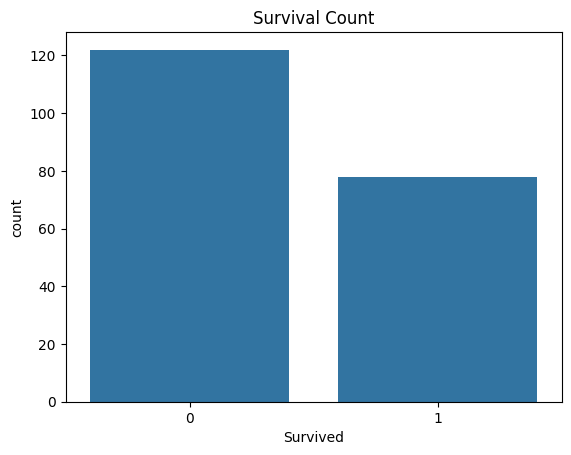

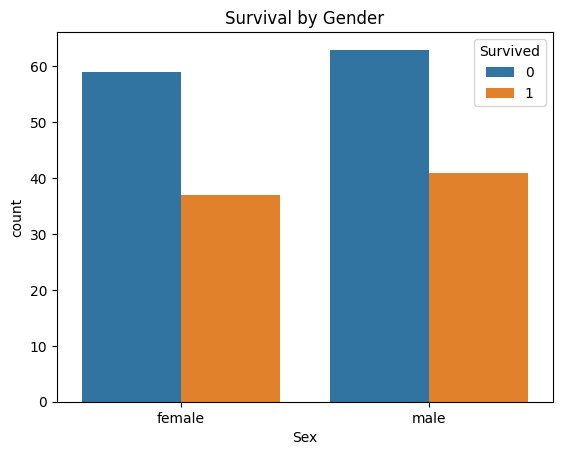

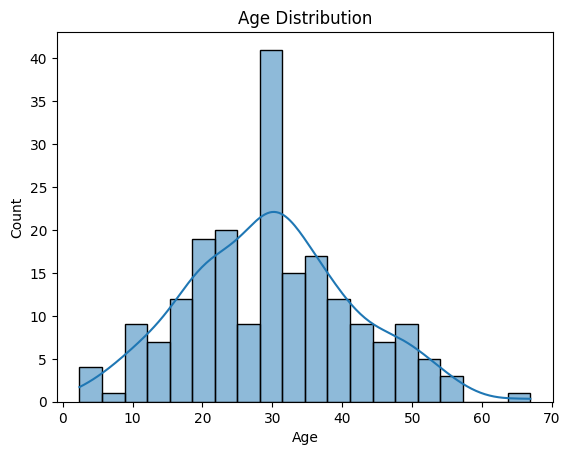

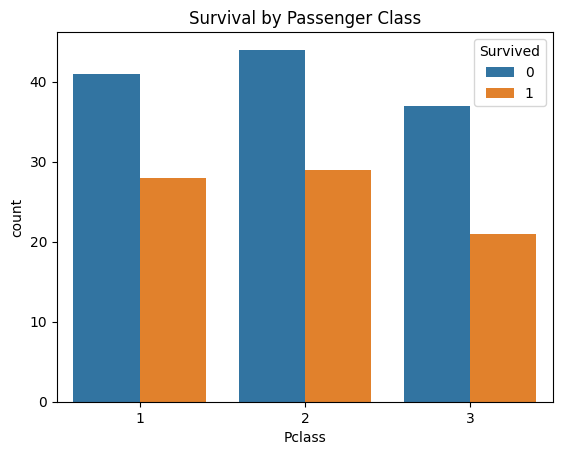

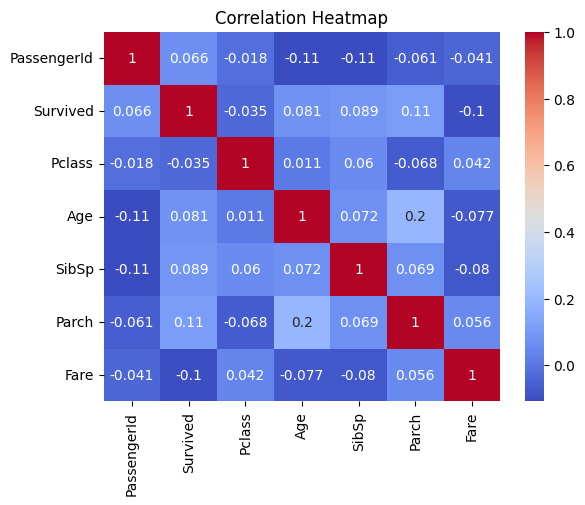

In [4]:
# Survival count
sns.countplot(x="Survived", data=df)
plt.title("Survival Count")
plt.show()

# Gender vs Survival
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival by Gender")
plt.show()

# Age distribution
sns.histplot(df["Age"], kde=True, bins=20)
plt.title("Age Distribution")
plt.show()

# Pclass vs Survival
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival by Passenger Class")
plt.show()

# Correlation heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
